## Sistem Prediksi Tingkat Stres Mahasiswa

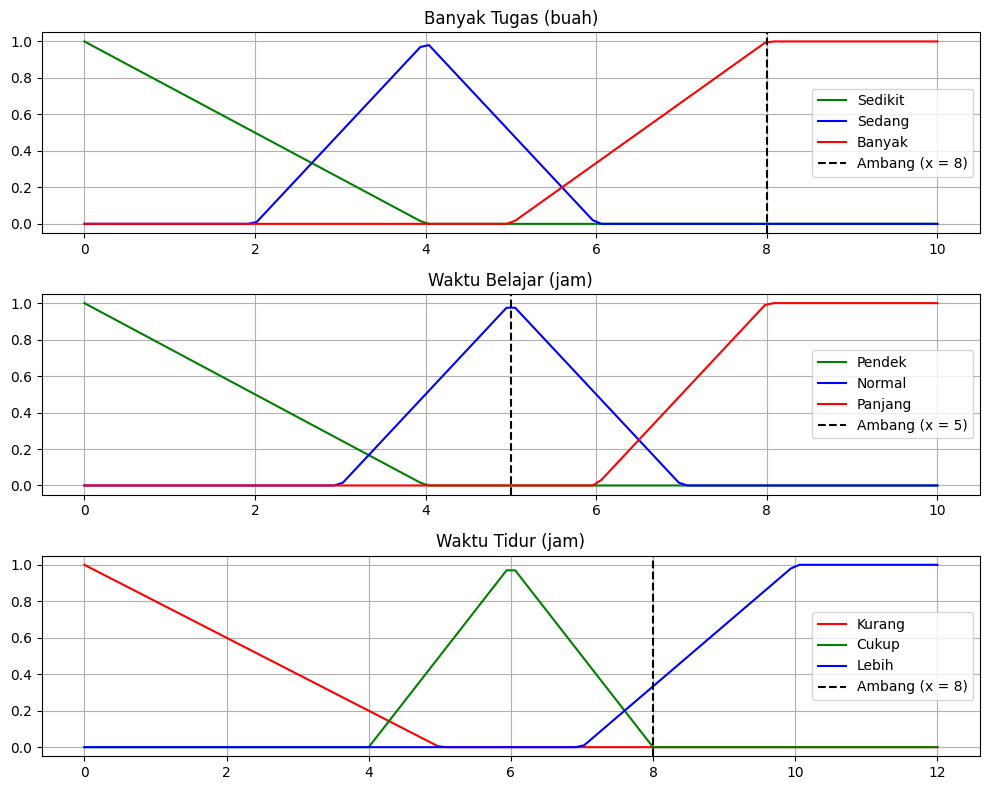

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def buat_plot_keanggotaan_fuzzy():
    # Menyiapkan figur dan sumbu untuk tiga grafik
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
    
    # Rentang data untuk setiap variabel (tugas, waktu belajar, dan waktu tidur)
    rentang_tugas = np.linspace(0, 10, 100)
    rentang_belajar = np.linspace(0, 10, 100)
    rentang_tidur = np.linspace(0, 12, 100)
    
    # Fungsi keanggotaan untuk 'Tugas'
    def tugas_sedikit(x): return np.maximum(0, np.minimum((4 - x) / 4, 1))
    def tugas_sedang(x): return np.maximum(0, np.minimum(np.minimum((x - 2) / 2, 1), (6 - x) / 2))
    def tugas_banyak(x): return np.maximum(0, np.minimum((x - 5) / 3, 1))
    
    # Plot untuk keanggotaan 'Tugas'
    ax1.plot(rentang_tugas, tugas_sedikit(rentang_tugas), 'g-', label='Sedikit')
    ax1.plot(rentang_tugas, tugas_sedang(rentang_tugas), 'b-', label='Sedang')
    ax1.plot(rentang_tugas, tugas_banyak(rentang_tugas), 'r-', label='Banyak')
    ax1.set_title('Banyak Tugas (buah)')
    ax1.axvline(x=8, color='k', linestyle='--', label='Ambang (x = 8)')
    ax1.grid(True)
    ax1.legend()
    
    # Fungsi keanggotaan untuk 'Waktu Belajar'
    def belajar_pendek(x): return np.maximum(0, np.minimum((4 - x) / 4, 1))
    def belajar_normal(x): return np.maximum(0, np.minimum(np.minimum((x - 3) / 2, 1), (7 - x) / 2))
    def belajar_panjang(x): return np.maximum(0, np.minimum((x - 6) / 2, 1))
    
    # Plot untuk keanggotaan 'Waktu Belajar'
    ax2.plot(rentang_belajar, belajar_pendek(rentang_belajar), 'g-', label='Pendek')
    ax2.plot(rentang_belajar, belajar_normal(rentang_belajar), 'b-', label='Normal')
    ax2.plot(rentang_belajar, belajar_panjang(rentang_belajar), 'r-', label='Panjang')
    ax2.set_title('Waktu Belajar (jam)')
    ax2.axvline(x=5, color='k', linestyle='--', label='Ambang (x = 5)')
    ax2.grid(True)
    ax2.legend()
    
    # Fungsi keanggotaan untuk 'Waktu Tidur'
    def tidur_kurang(x): return np.maximum(0, np.minimum((5 - x) / 5, 1))
    def tidur_cukup(x): return np.maximum(0, np.minimum(np.minimum((x - 4) / 2, 1), (8 - x) / 2))
    def tidur_lebih(x): return np.maximum(0, np.minimum((x - 7) / 3, 1))
    
    # Plot untuk keanggotaan 'Waktu Tidur'
    ax3.plot(rentang_tidur, tidur_kurang(rentang_tidur), 'r-', label='Kurang')
    ax3.plot(rentang_tidur, tidur_cukup(rentang_tidur), 'g-', label='Cukup')
    ax3.plot(rentang_tidur, tidur_lebih(rentang_tidur), 'b-', label='Lebih')
    ax3.set_title('Waktu Tidur (jam)')
    ax3.axvline(x=8, color='k', linestyle='--', label='Ambang (x = 8)')
    ax3.grid(True)
    ax3.legend()
    
    # Menata layout dan menampilkan grafik
    plt.tight_layout()
    plt.show()

# Menampilkan plot keanggotaan fuzzy
buat_plot_keanggotaan_fuzzy()


In [2]:
def hitung_stres(jumlah_tugas, waktu_belajar, waktu_tidur):
    """
    Menghitung tingkat stres berdasarkan:
    - Jumlah tugas (dalam satuan tugas)
    - Waktu belajar (dalam jam)
    - Waktu tidur (dalam jam)
    """
    # Menentukan level untuk setiap parameter
    if jumlah_tugas >= 7:  # Tugas banyak
        level_tugas = "BANYAK"
    elif 4 <= jumlah_tugas < 7:  # Tugas sedang
        level_tugas = "SEDANG"
    else:  # Tugas sedikit
        level_tugas = "SEDIKIT"
        
    if waktu_belajar >= 7:  # Belajar lama
        level_belajar = "PANJANG"
    elif 4 <= waktu_belajar < 7:  # Belajar normal
        level_belajar = "NORMAL"
    else:  # Belajar sebentar
        level_belajar = "PENDEK"
        
    if waktu_tidur < 6:  # Tidur kurang
        level_tidur = "KURANG"
    elif 6 <= waktu_tidur < 9:  # Tidur cukup
        level_tidur = "CUKUP"
    else:  # Tidur lebih
        level_tidur = "LEBIH"

    # Aturan untuk menentukan tingkat stres
    if level_tugas == "BANYAK" and level_belajar == "NORMAL" and level_tidur == "CUKUP":
        return "SEDANG"
    elif level_tugas == "BANYAK" and level_tidur == "KURANG":
        return "TINGGI"
    elif level_tugas == "SEDIKIT" and level_tidur == "CUKUP":
        return "RENDAH"
    else:
        return "SEDANG"

# Penggunaan dengan input yang diberikan
tugas = 8
belajar = 5
tidur = 8

hasil = hitung_stres(tugas, belajar, tidur)
print(f"Jumlah Tugas: {tugas}, Waktu Belajar: {belajar} jam, Waktu Tidur: {tidur} jam -> Tingkat Stres: {hasil}")


Jumlah Tugas: 8, Waktu Belajar: 5 jam, Waktu Tidur: 8 jam -> Tingkat Stres: SEDANG
